Name: Siya Gampawar
Roll No. : D3-15

Experiment 4


4A. Generate 61 points fortarget = sin x , where x ∈ [−3, 3]. Use this dataset to train
two layer neural networks using gradient descent learning algorithm. Draw two curves with
different colours, for target and output(y) of the trained neural network.

METHOD1

In [2]:
import numpy as np
# Generate input values x
x = np.linspace(-3, 3, 61) # 61 points from -3 to 3
# Calculate target values
y_true = np.sin(x) # sine of each x
np.random.seed(42) # For consistent results
# Sizes of each layer
input_size = 1
hidden_size = 10
output_size = 1
# Initialize weights randomly and biases to zero
W1 = np.random.randn(input_size, hidden_size) # Input to hidden layer weights
b1 = np.zeros((1, hidden_size)) # Hidden layer biases
W2 = np.random.randn(hidden_size, output_size) # Hidden to output layer weights
b2 = np.zeros((1, output_size)) # Output layer biases

def relu(z):
    return np.maximum(0, z)

learning_rate = 0.01
epochs = 1000 # Number of times to loop through the entire dataset
    
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(x.reshape(-1, 1), W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2.flatten()
    # Calculate the loss (Mean Squared Error)
    loss = np.mean((y_pred - y_true) ** 2)
   

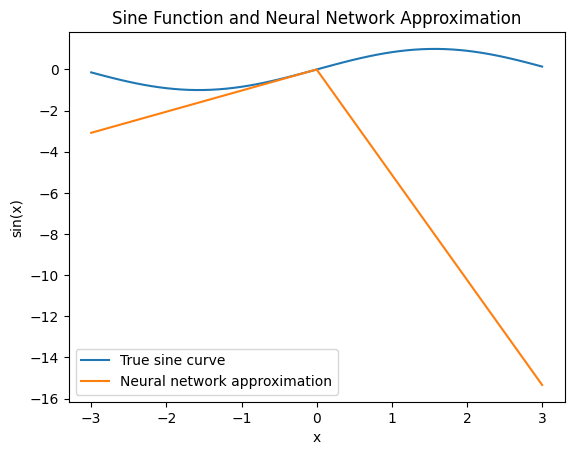

In [3]:
import matplotlib.pyplot as plt
# Plotting the original sine curve and the neural network's approximation
plt.plot(x, y_true, label='True sine curve')
plt.plot(x, y_pred, label='Neural network approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine Function and Neural Network Approximation')
plt.show()

METHOD2


In [4]:
import numpy as np
# Generate 61 points for x in the range [-3, 3]
x = np.linspace(-3, 3, 61)
# Compute the target sin(x) for each x
y_true = np.sin(x)
# Define the size of each layer
input_size = 1 # Single input
hidden_size = 10 # Number of neurons in the hidden layer
output_size = 1 # Single output
# Initialize weights and biases
np.random.seed(42) # For reproducibility
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))
def relu(z):
    return np.maximum(0, z)
def relu_deriv(z):
    return (z > 0).astype(float)

learning_rate = 0.01
epochs = 10000
losses = []
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(x.reshape(-1, 1), W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2
    # Compute loss (Mean Squared Error)
    loss = np.mean((y_pred.flatten() - y_true) ** 2)
    losses.append(loss)
    # Backpropagation
    d_loss_y_pred = 2 * (y_pred.flatten() - y_true) / y_true.size
    d_loss_y_pred = d_loss_y_pred.reshape(-1, 1)
    # Compute gradients
    d_loss_Z2 = d_loss_y_pred
    d_loss_A1 = np.dot(d_loss_Z2, W2.T)
    d_loss_W2 = np.dot(A1.T, d_loss_Z2)
    d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)
    d_loss_Z1 = d_loss_A1 * relu_deriv(Z1)
    d_loss_W1 = np.dot(x.reshape(-1, 1).T, d_loss_Z1)
    d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)
    # Update weights and biases
    W1 -= learning_rate * d_loss_W1
    b1 -= learning_rate * d_loss_b1
    W2 -= learning_rate * d_loss_W2
    b2 -= learning_rate * d_loss_b2

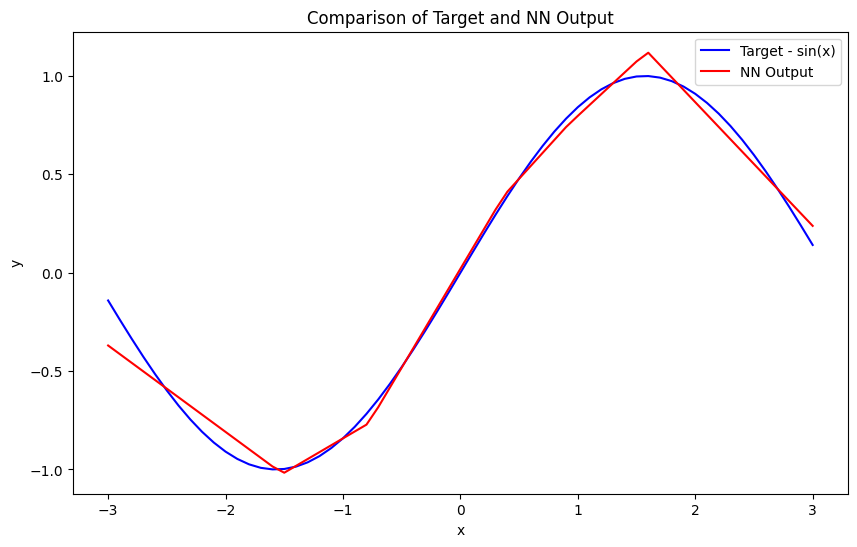

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Target - sin(x)', color='blue')
plt.plot(x, y_pred.flatten(), label='NN Output', color='red')
plt.title('Comparison of Target and NN Output')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

4B.Use MNIST dataset to train neural networks using gradient descent learning
algorithm.Experiments with various Architectures of neural networks, and with different
activation functions for hidden and output layers.

In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Step 2: Preprocess the data
# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0
# Step 3: Define the model architecture
def create_model(hidden_layers=1, neurons=64, activation='relu', input_shape=(28, 28)):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape)) # Flatten the input
    for _ in range(hidden_layers):
        model.add(layers.Dense(neurons, activation=activation)) # Add hidden layers
        model.add(layers.Dense(10, activation='softmax')) # Output layer with softmax activation
        return model
# Example: Create a model with 2 hidden layers, 64 neurons each, using ReLU activation
model = create_model(hidden_layers=2, neurons=64, activation='relu', input_shape=(28, 28))
# Step 4: Compile the model
model.compile(optimizer='sgd', # Stochastic Gradient Descent
loss='sparse_categorical_crossentropy', # Loss function for integers
metrics=['accuracy'])
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)
# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


11490434/11490434 [==============================] - 3s 0us/step


Epoch 1/10


1688/1688 [==============================] - 11s 4ms/step - loss: 0.7069 - accuracy: 0.8180 - val_loss: 0.3264 - val_accuracy: 0.9135
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3588 - accuracy: 0.8995 - val_loss: 0.2648 - val_accuracy: 0.9280
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3095 - accuracy: 0.9120 - val_loss: 0.2368 - val_accuracy: 0.9323
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2799 - accuracy: 0.9214 - val_loss: 0.2172 - val_accuracy: 0.9393
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2574 - accuracy: 0.9271 - val_loss: 0.2030 - val_accuracy: 0.9430
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2391 - accuracy: 0.9331 - val_loss: 0.1904 - val_accuracy: 0.9457
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/st